In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 13.8 MB/s eta 0:00:00a 0:00:01


In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import cv2
import random

In [3]:
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

100%|██████████| 6.25M/6.25M [00:00<00:00, 75.7MB/s]

Transferred 355/355 items from pretrained weights


In [4]:
result = model.train(data="/kaggle/input/bone-fracture-detection-computer-vision-project/data.yaml",epochs=50, batch = 16 ,lr0=0.0001)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/bone-fracture-detection-computer-vision-project/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-07-03 12:03:40,358	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-03 12:03:41,141	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:16<00:00, 226.57it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:01<00:00, 238.74it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.32G      2.775        6.7      2.351         16        640: 100%|██████████| 227/227 [00:41<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.91it/s]

                   all        348        204   0.000789      0.314    0.00259   0.000911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.28G      2.477      5.117      2.105         14        640: 100%|██████████| 227/227 [00:36<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.31it/s]

                   all        348        204      0.278     0.0618     0.0451     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.27G      2.439      4.169      2.095         18        640: 100%|██████████| 227/227 [00:36<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.42it/s]

                   all        348        204     0.0902     0.0964     0.0525     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G      2.408      3.841      2.125         20        640: 100%|██████████| 227/227 [00:36<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]

                   all        348        204      0.438      0.103     0.0724     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.28G      2.375      3.538      2.075         20        640: 100%|██████████| 227/227 [00:37<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.33it/s]

                   all        348        204      0.432      0.113     0.0718     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.27G        2.3      3.268          2         16        640: 100%|██████████| 227/227 [00:37<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.22it/s]

                   all        348        204       0.18      0.164      0.107     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.27G      2.261      3.158      2.013         17        640: 100%|██████████| 227/227 [00:36<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]

                   all        348        204      0.294      0.128      0.127     0.0432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.26G      2.231      3.061      1.986         17        640: 100%|██████████| 227/227 [00:36<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.33it/s]

                   all        348        204      0.471      0.161      0.131     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.28G      2.185      2.957      1.931         15        640: 100%|██████████| 227/227 [00:36<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.41it/s]

                   all        348        204      0.286      0.144      0.113     0.0367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.27G      2.159       2.83      1.909         13        640: 100%|██████████| 227/227 [00:36<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.37it/s]

                   all        348        204      0.215      0.189      0.155     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.27G      2.117      2.764      1.883          8        640: 100%|██████████| 227/227 [00:35<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.49it/s]

                   all        348        204      0.243      0.238      0.193     0.0752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.27G      2.082      2.682      1.874         11        640: 100%|██████████| 227/227 [00:36<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]

                   all        348        204       0.22      0.233      0.201      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.27G      2.046      2.553      1.836         18        640: 100%|██████████| 227/227 [00:35<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.72it/s]

                   all        348        204      0.228      0.272      0.216     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.27G      2.027      2.518      1.826         21        640: 100%|██████████| 227/227 [00:36<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.58it/s]

                   all        348        204       0.24      0.269      0.229     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.27G      1.974      2.427      1.786         15        640: 100%|██████████| 227/227 [00:36<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.42it/s]

                   all        348        204      0.328      0.268      0.231     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.26G      1.986      2.367      1.785         16        640: 100%|██████████| 227/227 [00:36<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]

                   all        348        204      0.312      0.342      0.236     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.27G      1.979      2.346      1.768         12        640: 100%|██████████| 227/227 [00:36<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.63it/s]

                   all        348        204      0.332      0.338       0.27        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.27G      1.911      2.245      1.748         14        640: 100%|██████████| 227/227 [00:36<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.71it/s]

                   all        348        204      0.287      0.297       0.25     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.27G      1.911      2.175      1.742         12        640: 100%|██████████| 227/227 [00:36<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]

                   all        348        204      0.315       0.33      0.243     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.26G      1.879      2.137      1.708         21        640: 100%|██████████| 227/227 [00:36<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.42it/s]

                   all        348        204      0.427       0.24      0.207     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.27G      1.855      2.104      1.689         23        640: 100%|██████████| 227/227 [00:39<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.09it/s]

                   all        348        204      0.328      0.275       0.25     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.27G      1.825      2.007      1.653         11        640: 100%|██████████| 227/227 [00:35<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.49it/s]

                   all        348        204      0.336      0.256      0.232     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.27G      1.797      1.917      1.637         17        640: 100%|██████████| 227/227 [00:35<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.42it/s]

                   all        348        204      0.258      0.315      0.238      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.26G      1.797        1.9       1.65         19        640: 100%|██████████| 227/227 [00:36<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]

                   all        348        204      0.282      0.275      0.251     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.27G      1.767       1.84      1.622         14        640: 100%|██████████| 227/227 [00:36<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]

                   all        348        204       0.33      0.275      0.248     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.27G      1.725      1.797      1.598         14        640: 100%|██████████| 227/227 [00:36<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.46it/s]

                   all        348        204      0.336      0.319       0.27     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.27G      1.736      1.772      1.584         19        640: 100%|██████████| 227/227 [00:36<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.63it/s]

                   all        348        204      0.316      0.331      0.268     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G      1.678      1.709      1.557         19        640: 100%|██████████| 227/227 [00:36<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.68it/s]

                   all        348        204      0.308      0.275      0.261     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.28G      1.666      1.655      1.533         10        640: 100%|██████████| 227/227 [00:35<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.47it/s]

                   all        348        204      0.325      0.292      0.258     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.27G      1.645      1.619      1.535         17        640: 100%|██████████| 227/227 [00:36<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.30it/s]

                   all        348        204      0.341      0.309       0.26     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.27G      1.605       1.57      1.504         22        640: 100%|██████████| 227/227 [00:36<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.39it/s]

                   all        348        204      0.395      0.267      0.261     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.26G        1.6      1.534      1.493         20        640: 100%|██████████| 227/227 [00:35<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.74it/s]

                   all        348        204      0.297       0.28      0.263     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.28G      1.579       1.52      1.478         12        640: 100%|██████████| 227/227 [00:36<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.84it/s]

                   all        348        204       0.28      0.301       0.24     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.27G      1.556      1.447      1.456         24        640: 100%|██████████| 227/227 [00:36<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]

                   all        348        204      0.263      0.301      0.228     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.27G      1.545      1.384      1.448         16        640: 100%|██████████| 227/227 [00:37<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.72it/s]

                   all        348        204      0.331      0.275      0.247       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.26G      1.503      1.367      1.427          9        640: 100%|██████████| 227/227 [00:36<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.63it/s]

                   all        348        204      0.381      0.286      0.289     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.27G      1.503       1.35       1.43         17        640: 100%|██████████| 227/227 [00:37<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.77it/s]

                   all        348        204      0.375      0.253      0.261     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.27G      1.479       1.31      1.396         18        640: 100%|██████████| 227/227 [00:36<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.69it/s]

                   all        348        204      0.324      0.314      0.272     0.0911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.27G      1.454       1.29        1.4         13        640: 100%|██████████| 227/227 [00:36<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.67it/s]

                   all        348        204      0.357      0.297      0.266     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.26G      1.405      1.223       1.35         17        640: 100%|██████████| 227/227 [00:36<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.63it/s]

                   all        348        204        0.4      0.283      0.278     0.0917


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.28G      1.369      1.109      1.428          9        640: 100%|██████████| 227/227 [00:35<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.11it/s]

                   all        348        204      0.301      0.294      0.252     0.0934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.27G      1.315      1.022      1.369          9        640: 100%|██████████| 227/227 [00:34<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.83it/s]

                   all        348        204      0.311      0.271      0.265      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.27G      1.291     0.9897      1.361          8        640: 100%|██████████| 227/227 [00:34<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.81it/s]

                   all        348        204      0.397      0.274      0.265       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.26G      1.262     0.9283       1.32          6        640: 100%|██████████| 227/227 [00:34<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.21it/s]

                   all        348        204        0.4      0.249      0.274     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.28G       1.26     0.9192      1.327          8        640: 100%|██████████| 227/227 [00:34<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.54it/s]

                   all        348        204      0.276      0.331      0.256     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.27G      1.221     0.8939        1.3          7        640: 100%|██████████| 227/227 [00:33<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.83it/s]

                   all        348        204      0.445      0.254      0.256     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.27G       1.19     0.8702      1.284          8        640: 100%|██████████| 227/227 [00:33<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.98it/s]

                   all        348        204      0.359      0.261      0.253     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.26G      1.167     0.8442      1.262         14        640: 100%|██████████| 227/227 [00:33<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  6.88it/s]

                   all        348        204      0.416      0.239      0.261     0.0911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.28G       1.16     0.8214      1.258         11        640: 100%|██████████| 227/227 [00:33<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.14it/s]

                   all        348        204      0.322      0.292       0.26     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.27G      1.129     0.7961      1.237          7        640: 100%|██████████| 227/227 [00:34<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  7.07it/s]

                   all        348        204       0.42      0.242      0.266     0.0914



50 epochs completed in 0.541 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.60it/s]


                   all        348        204      0.381      0.286      0.286     0.0992
        elbow positive         28         29      0.184      0.172     0.0843     0.0326
      fingers positive         41         48      0.417      0.188      0.174     0.0531
      forearm fracture         37         43      0.597      0.488      0.544        0.2
               humerus         31         36      0.748      0.528      0.618      0.204
     shoulder fracture         19         20      0.275        0.3      0.256     0.0944
        wrist positive         17         28     0.0662     0.0408     0.0382     0.0108
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▂▃▄▄▄▄▆▆▆▇▇█▇▇▇▇▇▇█▇▇▇▇▇▇▇█▇█▇▇▇▇█▇▇▇█
metrics/mAP50-95(B),▁▂▂▃▄▄▄▄▆▆▆▇▇█▇▇▇▇▇▇██▇▇▇▇▇▆██▇▇██▇█▇▇▇█
metrics/precision(B),▁▅▂█▄▅█▅▅▄▄▅▆▆▅▆▆▆▅▅▆▆▆▆▇▅▅▅▇▇▆▆▅▆▇▇█▆▇▇
metrics/recall(B),▇▁▂▂▄▃▃▃▅▅▆▆██▇█▆▆▇▆▇█▆▇▆▆▇▇▇▆▇▇▇▆▆▆▆▆▅▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁


In [5]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

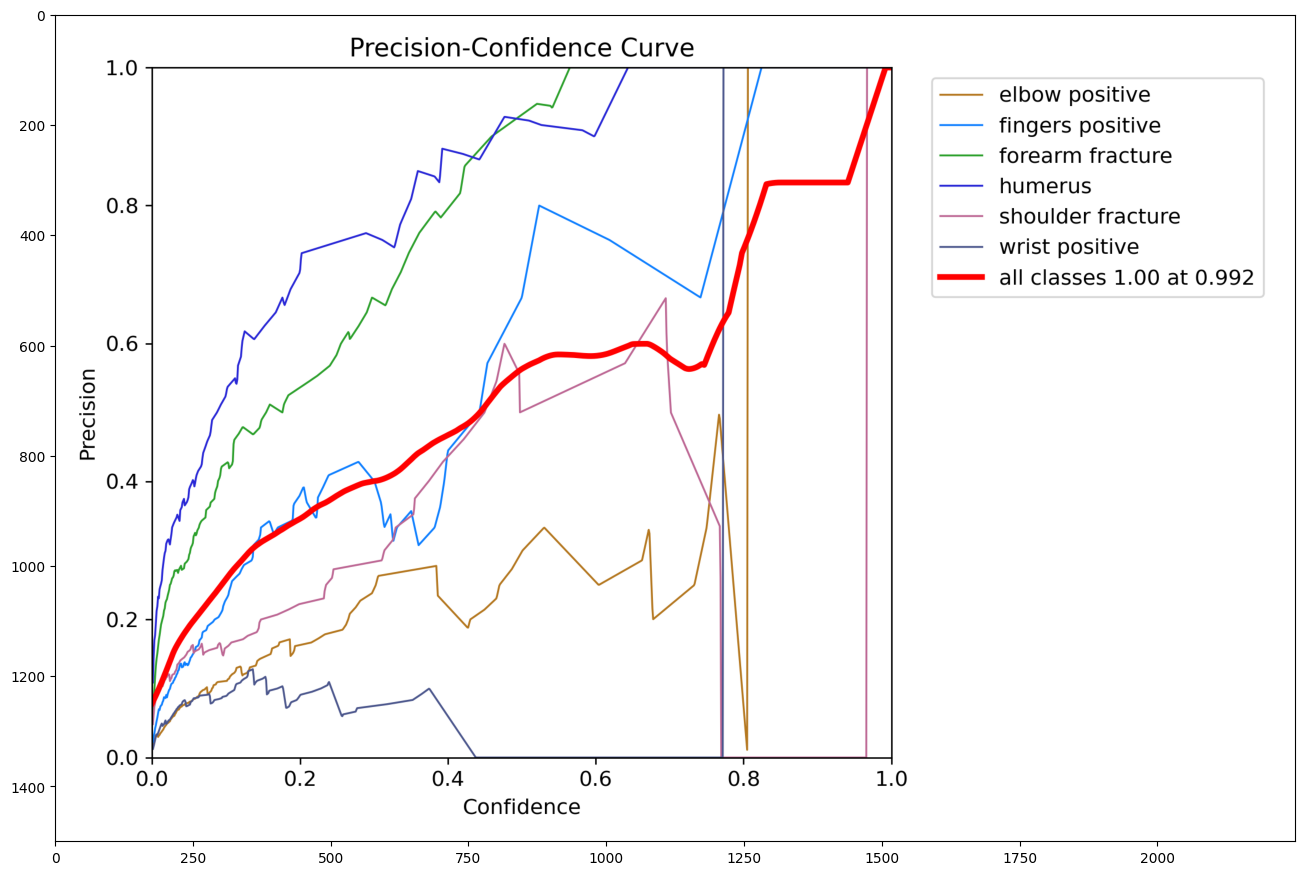

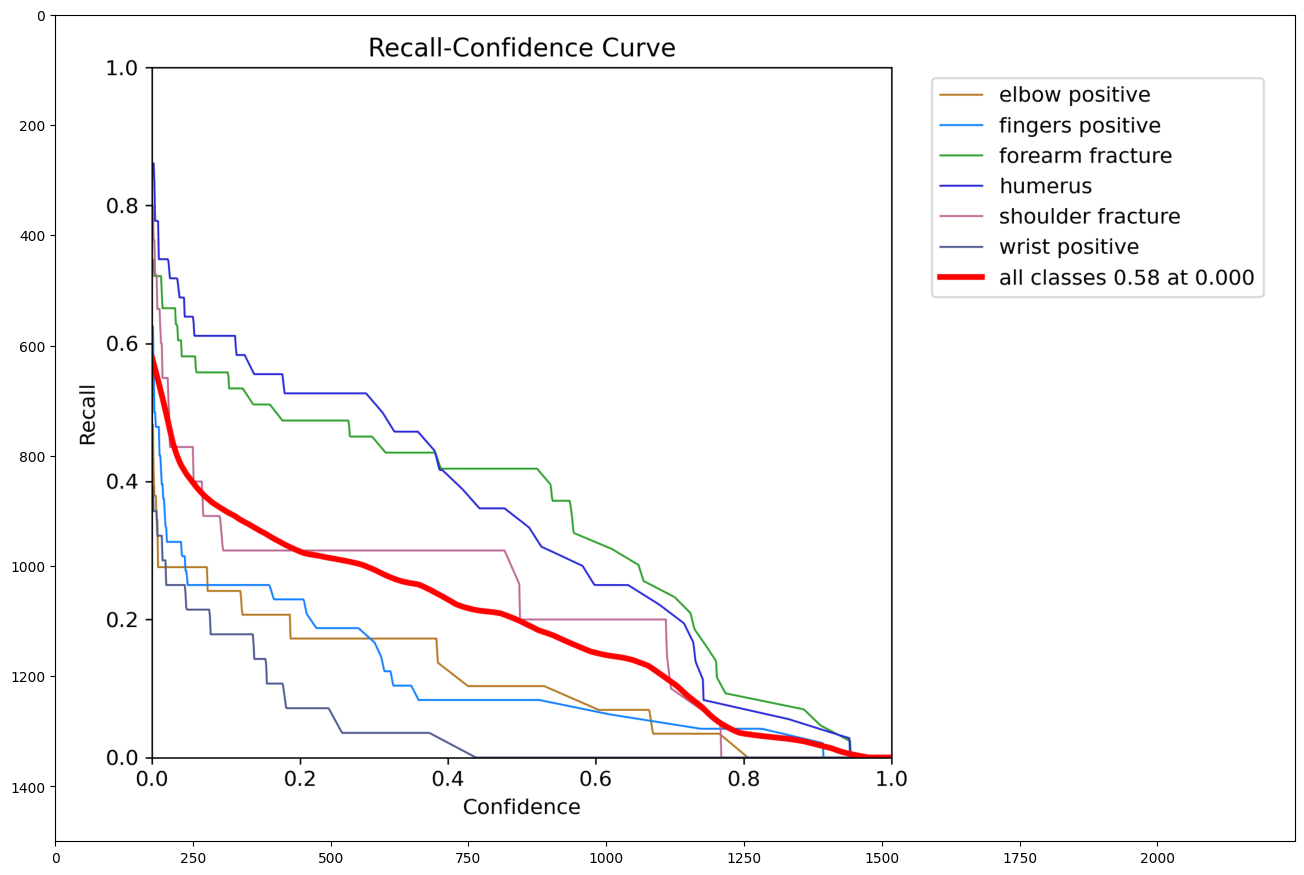

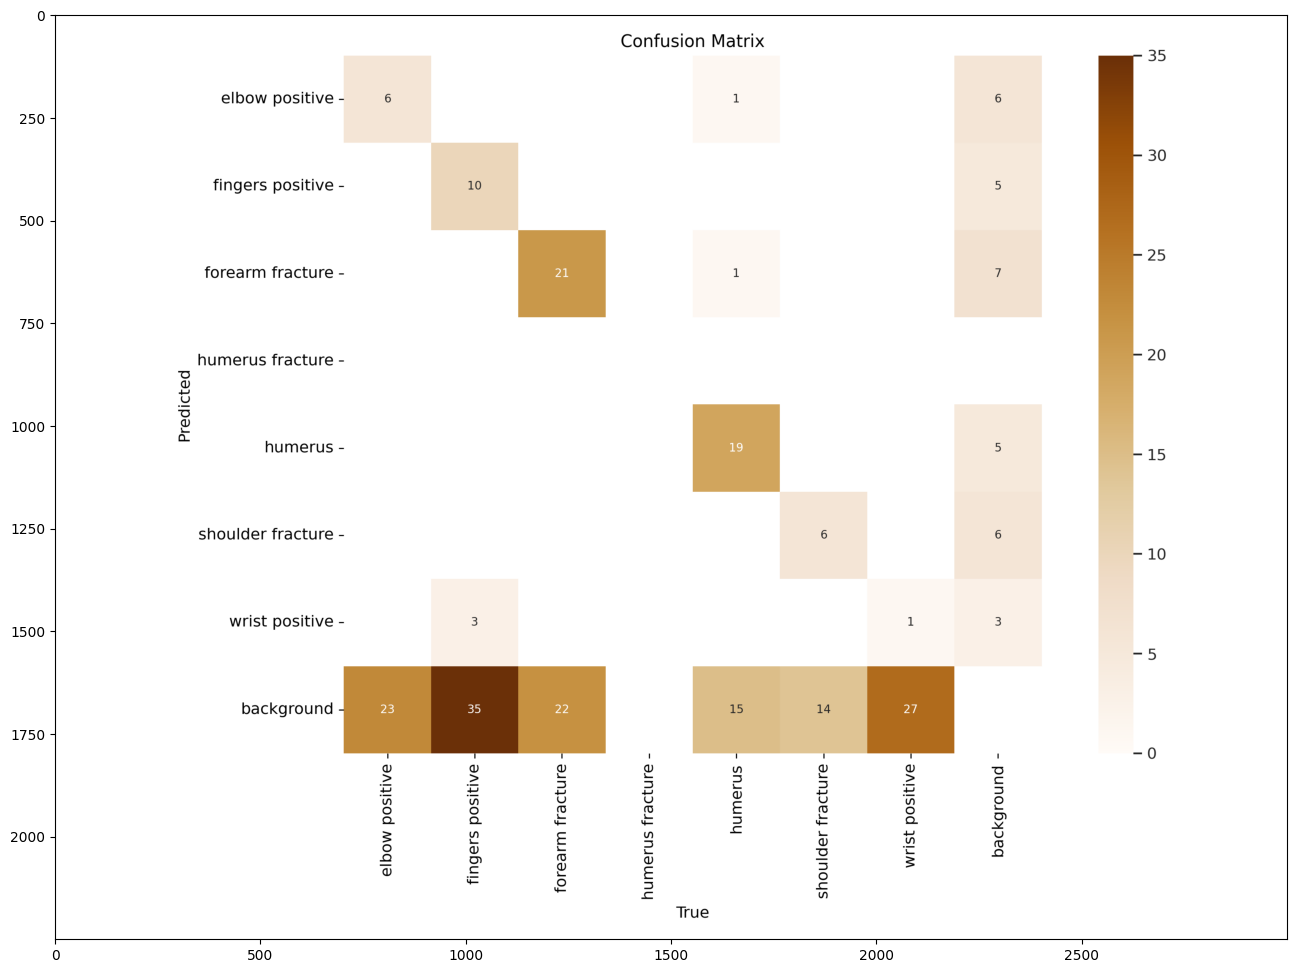

In [7]:
for i in list_of_metrics:
    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')

    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.show()

In [8]:
Result_Final_model = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
40,41,1.3685,1.10870,1.4277,0.30093,0.29359,0.25241,0.09339,2.6503,2.8534,2.5688,0.000189,0.000189,0.000189
41,42,1.3152,1.02210,1.3692,0.31097,0.27110,0.26497,0.09597,2.6114,2.8327,2.5629,0.000171,0.000171,0.000171
42,43,1.2907,0.98972,1.3608,0.39690,0.27444,0.26511,0.09003,2.7058,2.8478,2.6347,0.000153,0.000153,0.000153
43,44,1.2616,0.92832,1.3196,0.39988,0.24885,0.27407,0.09345,2.6804,2.8407,2.6582,0.000135,0.000135,0.000135
44,45,1.2602,0.91919,1.3274,0.27639,0.33074,0.25613,0.08827,2.7132,2.8567,2.6745,0.000117,0.000117,0.000117
45,46,1.2212,0.89385,1.2999,0.44469,0.25394,0.25602,0.08512,2.7040,2.9191,2.6945,0.000099,0.000099,0.000099
46,47,1.1896,0.87016,1.2840,0.35865,0.26098,0.25306,0.08733,2.6607,2.9366,2.6399,0.000081,0.000081,0.000081
47,48,1.1667,0.84423,1.2616,0.41556,0.23902,0.26128,0.09112,2.6659,2.9459,2.6893,0.000063,0.000063,0.000063
48,49,1.1599,0.82136,1.2581,0.32176,0.29210,0.26024,0.09241,2.6745,2.9941,2.6727,0.000045,0.000045,0.000045
49,50,1.1286,0.79605,1.2371,0.42029,0.24160,0.26579,0.09139,2.6589,2.9774,2.6717,0.000027,0.000027,0.000027


In [9]:
Result_Final_model.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [10]:
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/test/labels... 169 images, 86 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<00:00, 209.90it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/test is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.99it/s]


                   all        169         96      0.307      0.232      0.202     0.0569
        elbow positive         13         17      0.134     0.0588     0.0272     0.0101
      fingers positive         22         27      0.275      0.169      0.155     0.0405
      forearm fracture         13         14      0.639      0.429      0.407      0.114
               humerus         14         15      0.409      0.333      0.361      0.102
     shoulder fracture         15         17       0.32      0.235      0.222      0.055
        wrist positive          6          6      0.067      0.167     0.0401     0.0192
Speed: 0.2ms preprocess, 11.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


In [11]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.30733494883285023
metrics/recall(B):  0.2320235531666387
metrics/mAP50(B):  0.20204999138565763
metrics/mAP50-95(B):  0.056919115581494026


In [21]:
image_dir = '/kaggle/input/bone-fracture-detection-computer-vision-project/test/images'  

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=30)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)


0: 416x288 (no detections), 72.9ms
Speed: 1.3ms preprocess, 72.9ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 288)
Results saved to runs/detect/train22

0: 416x320 (no detections), 7.2ms
Speed: 1.0ms preprocess, 7.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 320)
Results saved to runs/detect/train23

0: 416x352 1 elbow positive, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 352)
Results saved to runs/detect/train24

0: 416x320 (no detections), 7.3ms
Speed: 1.1ms preprocess, 7.3ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 320)
Results saved to runs/detect/train25

0: 416x352 (no detections), 7.1ms
Speed: 1.6ms preprocess, 7.1ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 352)
Results saved to runs/detect/train26

0: 416x352 (no detections), 6.2ms
Speed: 1.1ms preprocess, 6.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 352)
Results saved to runs/dete

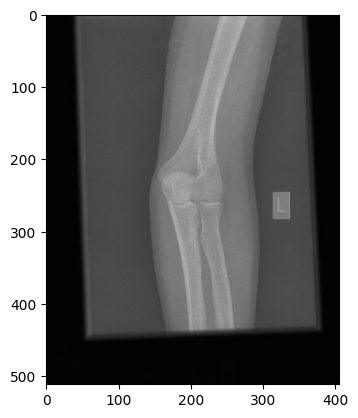

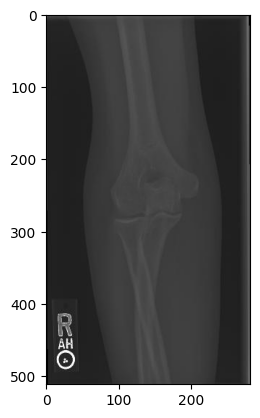

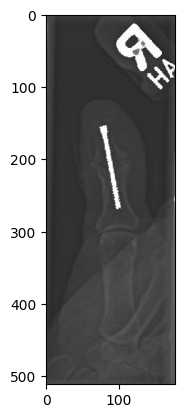

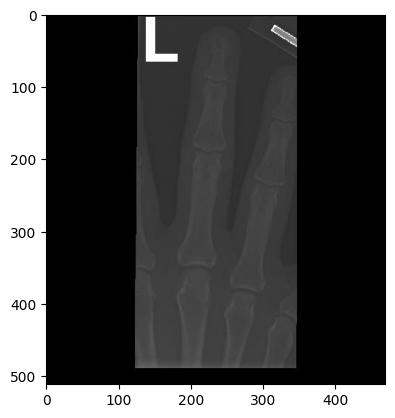

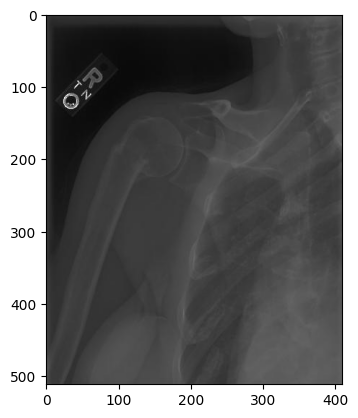

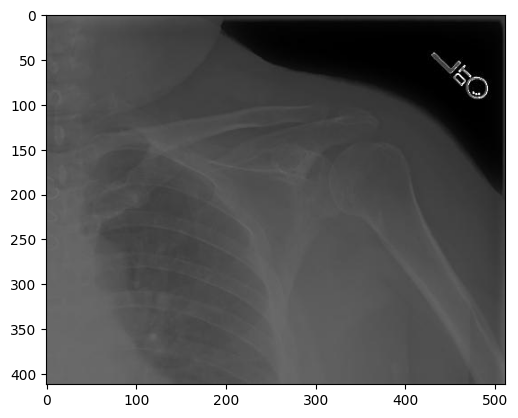

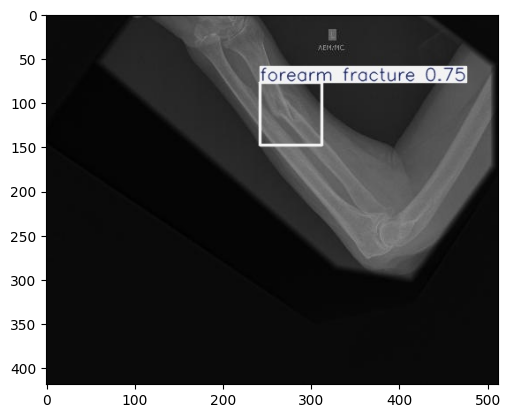

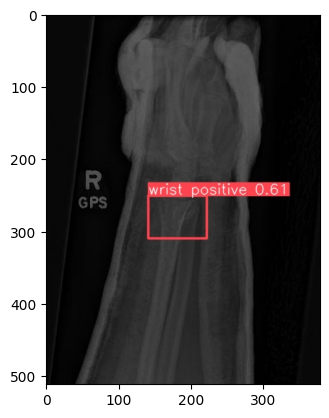

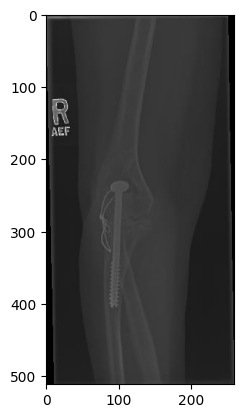

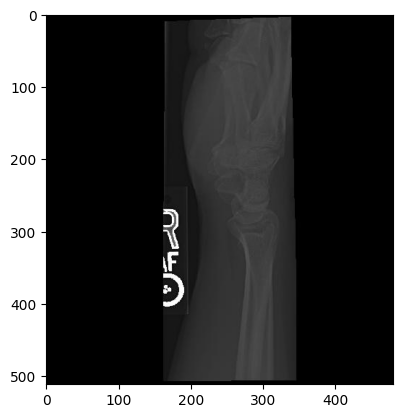

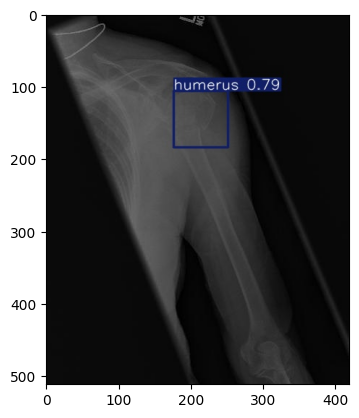

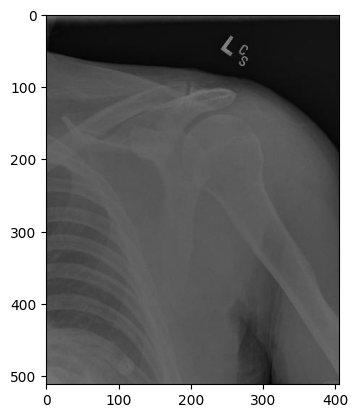

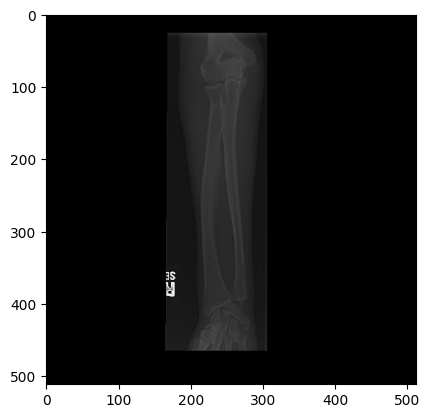

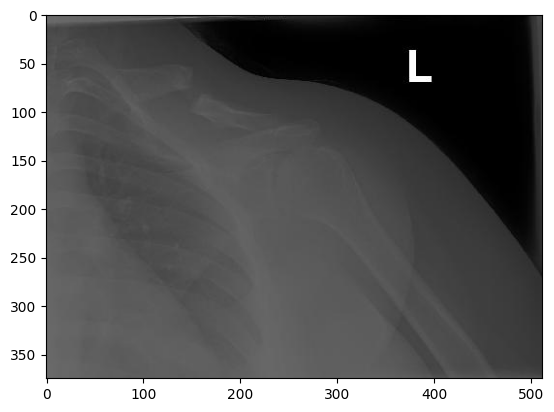

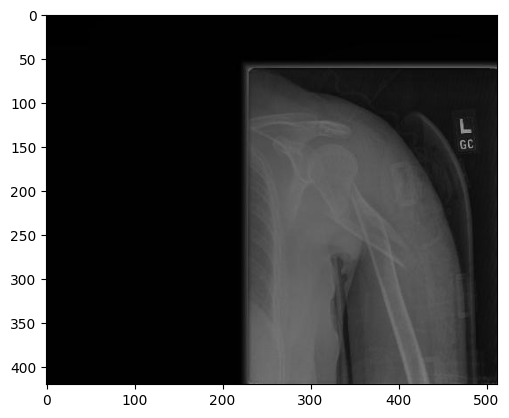

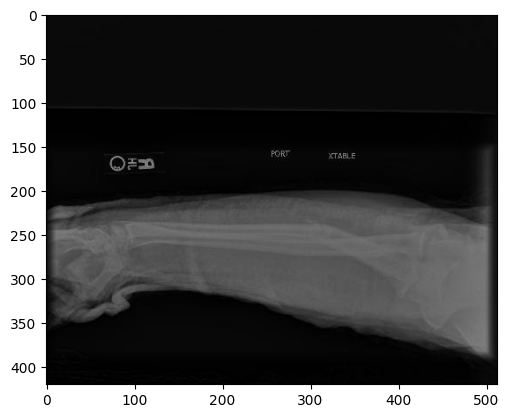

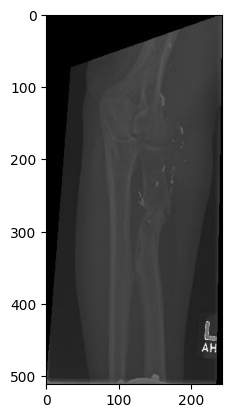

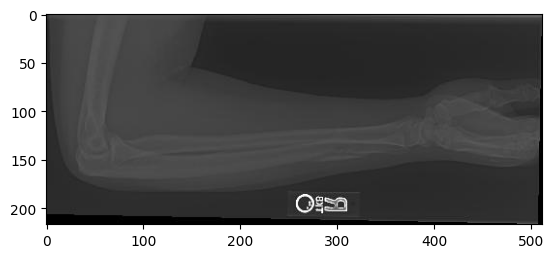

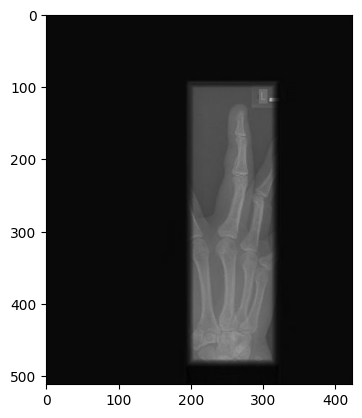

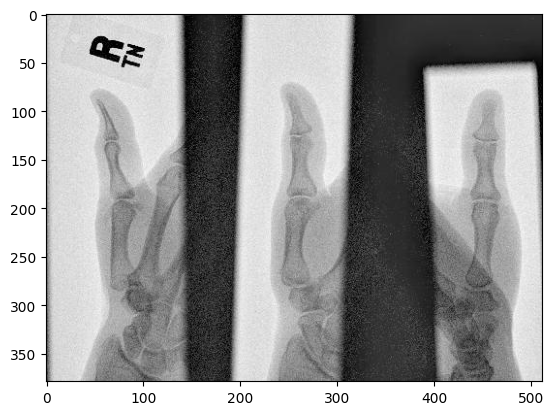

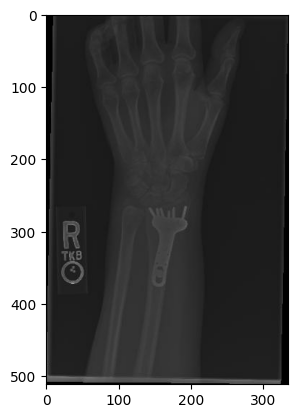

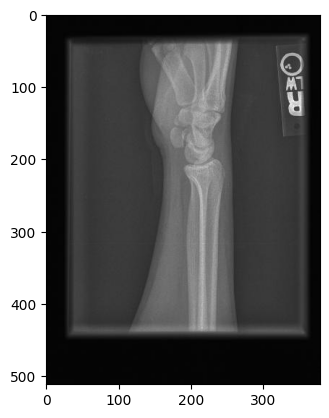

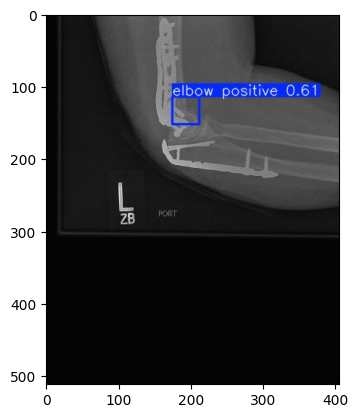

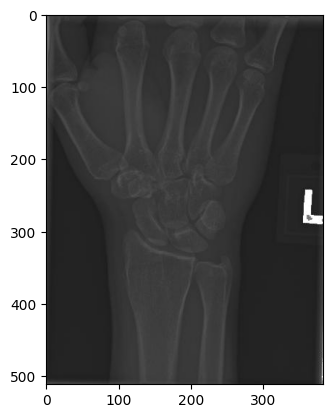

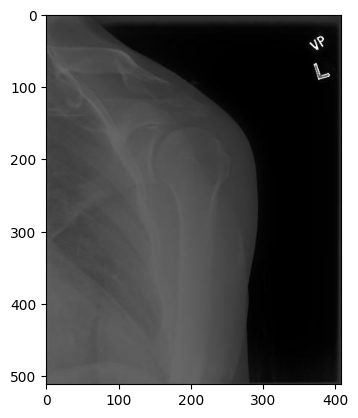

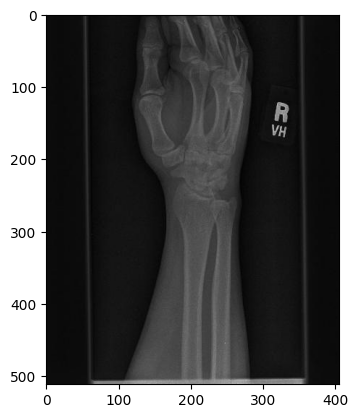

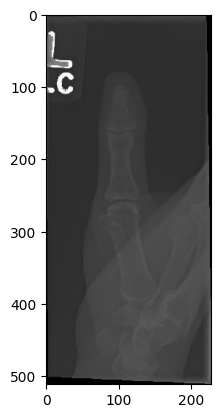

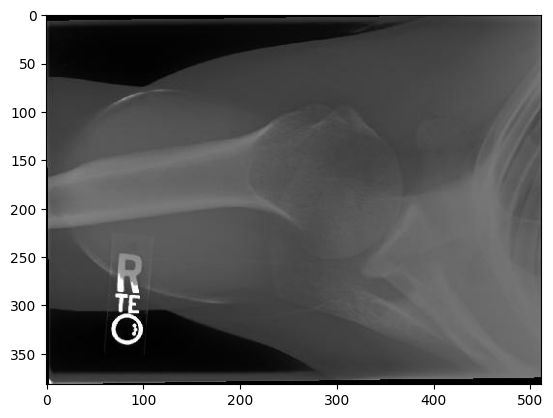

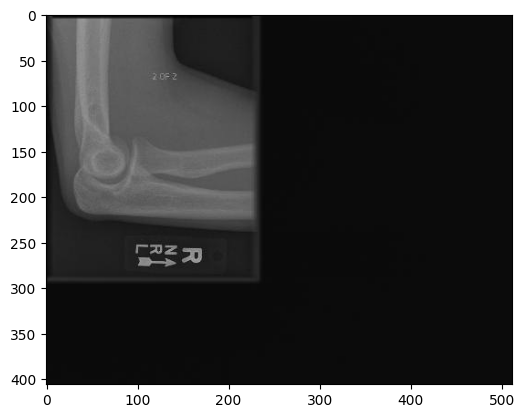

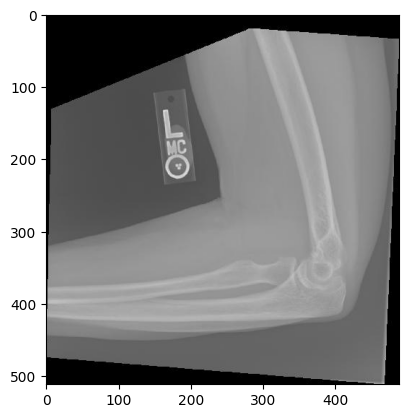

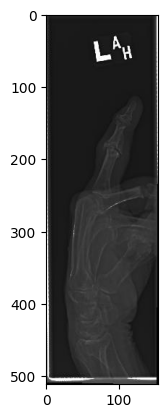

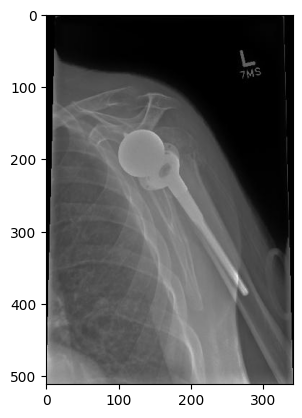

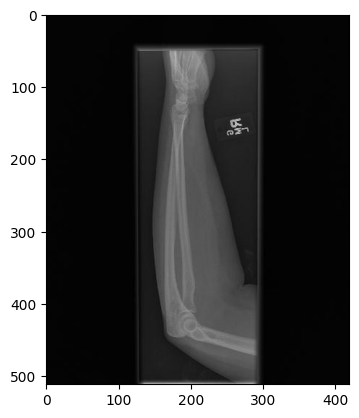

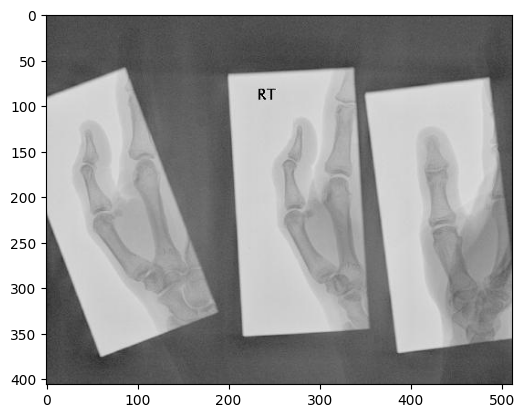

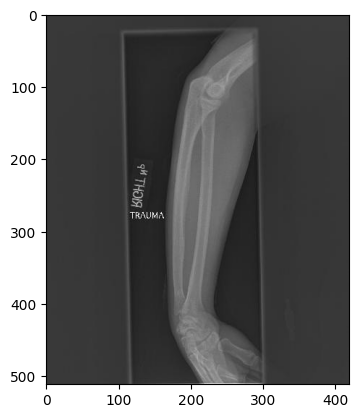

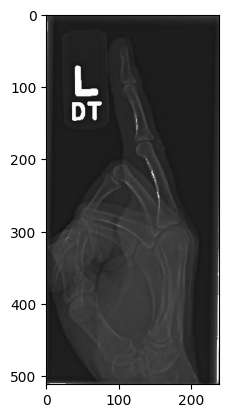

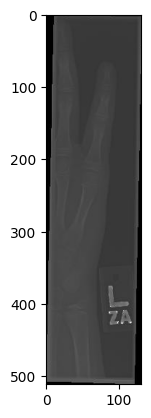

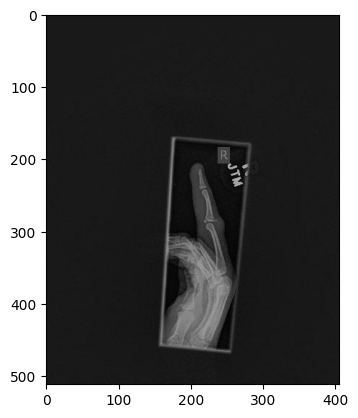

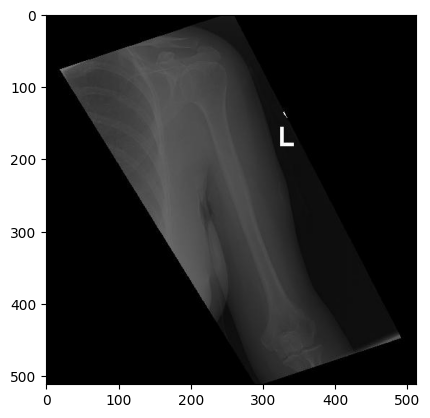

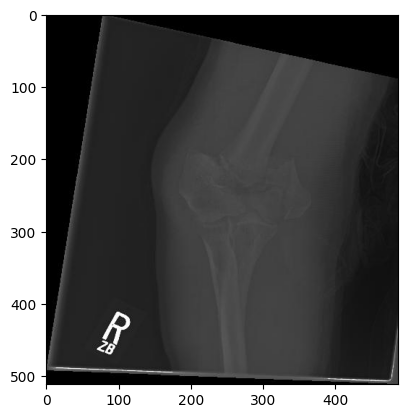

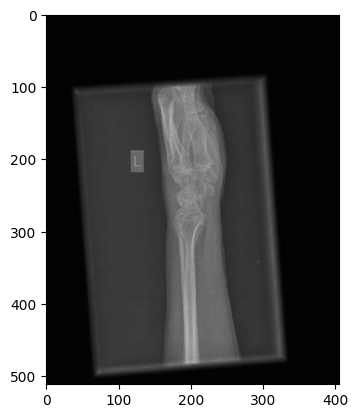

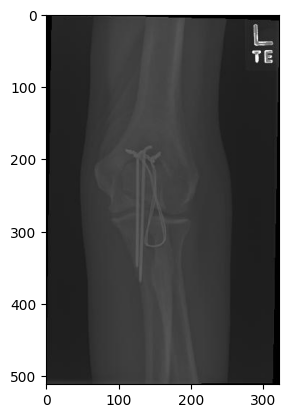

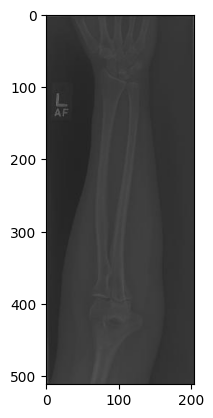

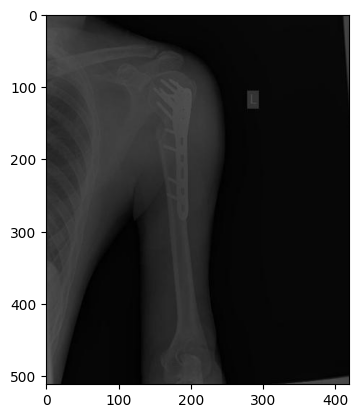

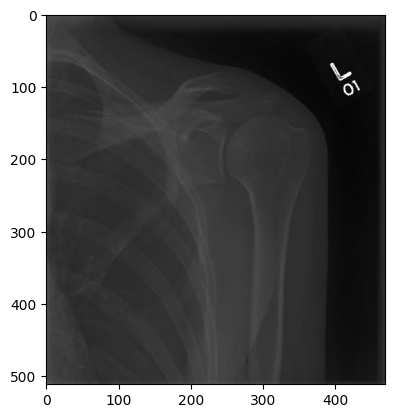

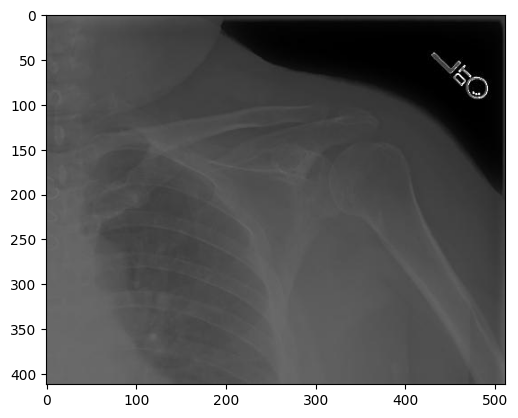

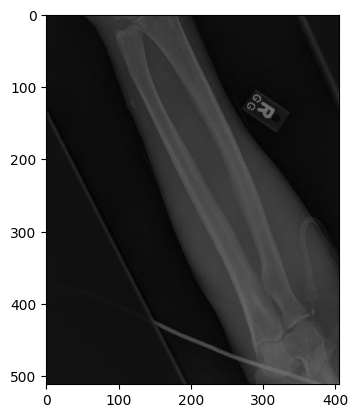

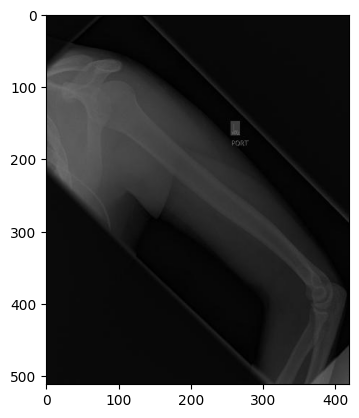

In [25]:
# View results
for i in range(2,50):
    plt.imshow(plt.imread(f'/kaggle/working/runs/detect/train{i}/image0.jpg'))
    plt.show()